In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Summary

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Drop unnecessary data

In [6]:
missing = train_df[train_df['Embarked'].isna()].index
train_df = train_df.drop(missing)

In [7]:
train_df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [8]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# Statistical information

In [9]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


# Visualization

In [11]:
import seaborn as sns

Text(0.5,1,'Male')

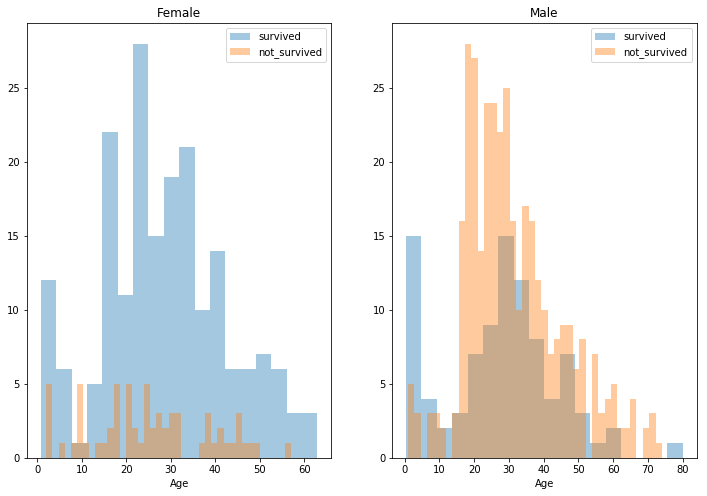

In [12]:
women = train_df[train_df.Sex == 'female']
men = train_df[train_df.Sex == 'male']
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(121)
ax1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', kde =False)
ax1 = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', kde =False)
ax1.legend()
ax1.set_title('Female')
ax1 = fig.add_subplot(122)
ax2 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', kde = False)
ax2 = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', kde = False)
ax2.legend()
ax2.set_title('Male')

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


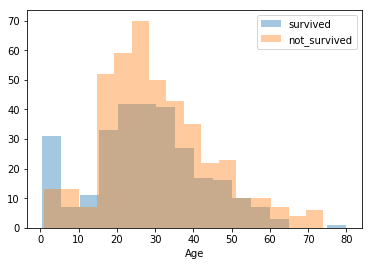

In [13]:
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax = sns.distplot(train_df[train_df.Survived == 1].Age.dropna(), label='survived', kde=False)
ax = sns.distplot(train_df[train_df.Survived == 0].Age.dropna(), label='not_survived', kde=False)
ax.legend()
plt.show()

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


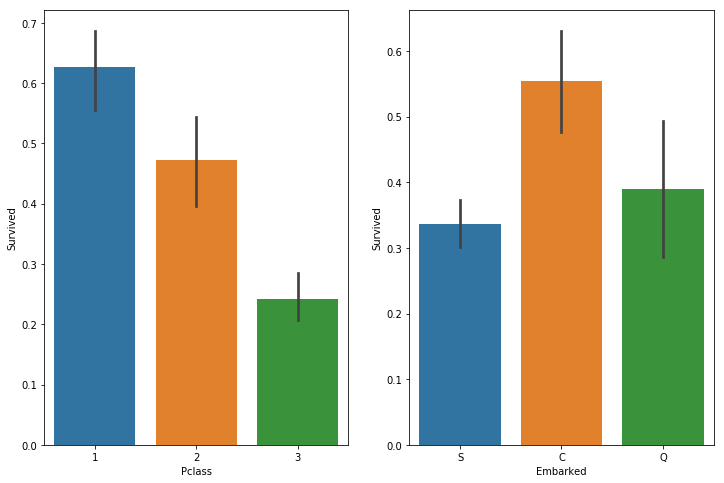

In [14]:
fig = plt.figure(figsize=[12,8])
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x='Pclass', y='Survived', data=train_df)
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.show()

# Combine SibSp and Parch as one feature: Relatives

In [15]:
train_df['Relatives'] = train_df.SibSp + train_df.Parch
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,0
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,4
8,1,3,female,27.0,0,2,11.1333,NaN,S,2
9,1,2,female,14.0,1,0,30.0708,NaN,C,1


In [16]:
train_df.Relatives.value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relatives, dtype: int64

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


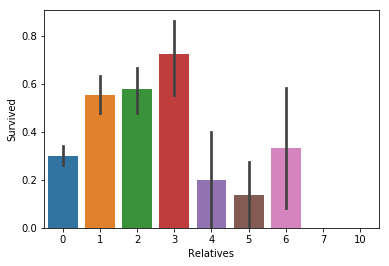

In [17]:
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
ax = sns.barplot(x='Relatives', y='Survived', data=train_df)
plt.show()

# Create new feature: Fare per person

In [18]:
train_df['Fare_per_person'] = train_df['Fare']/(train_df['Relatives'] + 1)

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


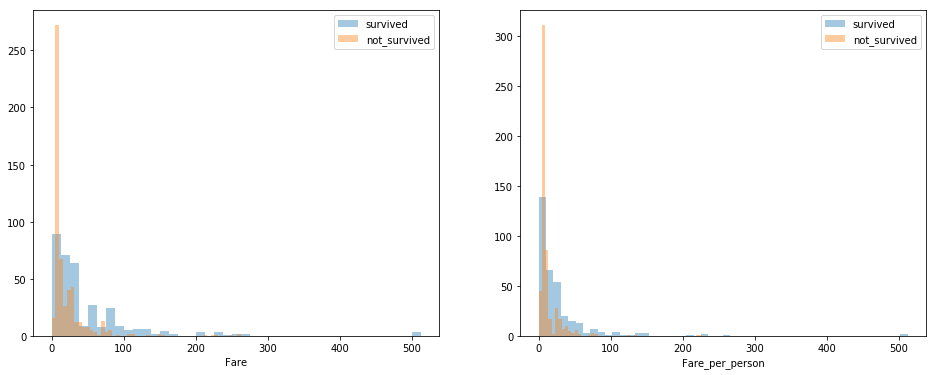

In [19]:
fig = plt.figure(figsize=[16,6])
ax1 = fig.add_subplot(121)
ax1 = sns.distplot(train_df[train_df.Survived == 1].Fare, label='survived', kde=False)
ax1 = sns.distplot(train_df[train_df.Survived == 0].Fare, label='not_survived', kde=False)
ax1.legend()
ax2 = fig.add_subplot(122)
ax2 = sns.distplot(train_df[train_df.Survived == 1].Fare_per_person, label='survived', kde=False)
ax2 = sns.distplot(train_df[train_df.Survived == 0].Fare_per_person, label='not_survived', kde=False)
ax2.legend()
plt.show()

# Manipulate test dataset

In [20]:
test_df = pd.read_csv('data/test.csv')

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test_df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [23]:
test_df['Relatives'] = test_df.SibSp + test_df.Parch
test_df['Fare_per_person'] = test_df['Fare']/(test_df['Relatives'] + 1)

In [24]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Fare_per_person
0,3,male,34.5,0,0,7.8292,NaN,Q,0,7.829200
1,3,female,47.0,1,0,7.0000,NaN,S,1,3.500000
2,2,male,62.0,0,0,9.6875,NaN,Q,0,9.687500
3,3,male,27.0,0,0,8.6625,NaN,S,0,8.662500
4,3,female,22.0,1,1,12.2875,NaN,S,2,4.095833
5,3,male,14.0,0,0,9.2250,NaN,S,0,9.225000
6,3,female,30.0,0,0,7.6292,NaN,Q,0,7.629200
7,2,male,26.0,1,1,29.0000,NaN,S,2,9.666667
8,3,female,18.0,0,0,7.2292,NaN,C,0,7.229200
9,3,male,21.0,2,0,24.1500,NaN,S,2,8.050000


# Data transformation

In [25]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Handle missing data

In [27]:
data = [train_df, test_df]
for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    dataset.loc[dataset.Age.isna(), 'Age'] = rand_age
train_df["Age"].isnull().sum()

0

# Binning

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset.Age = pd.cut(x=dataset.Age, bins=[0,11,18,22,27,33,40,66,np.inf], labels=list(range(0,8)))

In [29]:
data = [train_df, test_df]
for dataset in data:
    dataset.Age = dataset.Age.astype(int)

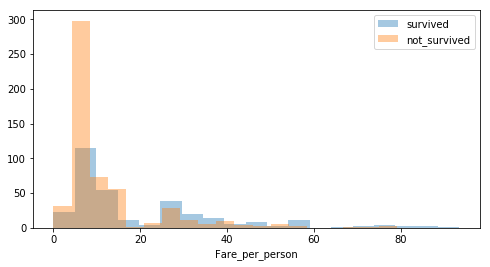

In [30]:
fig = plt.figure(figsize=[8,4])
f1 = train_df[train_df.Survived == 1].Fare_per_person
f0 = train_df[train_df.Survived == 0].Fare_per_person
ax = fig.add_subplot(111)
ax = sns.distplot(f1[f1 < 100], label='survived', bins=19, kde=False)
ax = sns.distplot(f0[f0 < 100], label='not_survived', bins=19, kde=False)
ax.legend()
plt.show()

In [31]:
data = [train_df, test_df]
for dataset in data:
    dataset.Fare_per_person = pd.cut(x=dataset.Fare_per_person, bins=[0,5,9,20,40,60,100,np.inf], labels=list(range(0,7)))
    dataset.Fare = pd.cut(x=dataset.Fare, bins=[0,5,9,20,40,60,100,np.inf], labels=list(range(0,7)))

In [32]:
train_df.loc[train_df.Fare_per_person.isna(), 'Fare_per_person']

179   NaN
263   NaN
271   NaN
277   NaN
302   NaN
413   NaN
466   NaN
481   NaN
597   NaN
633   NaN
674   NaN
732   NaN
806   NaN
815   NaN
822   NaN
Name: Fare_per_person, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [33]:
data = [train_df, test_df]
for dataset in data:
    dataset.Fare_per_person.fillna(0, inplace=True)
    dataset.Fare.fillna(0, inplace=True)
    dataset.Fare_per_person = dataset.Fare_per_person.astype(int)
    dataset.Fare = dataset.Fare.astype(int)

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int32
SibSp              418 non-null int64
Parch              418 non-null int64
Fare               418 non-null int32
Cabin              91 non-null object
Embarked           418 non-null int64
Relatives          418 non-null int64
Fare_per_person    418 non-null int32
dtypes: int32(3), int64(6), object(1)
memory usage: 27.8+ KB


# Create new feature 'Deck' from 'Cabin'

In [35]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]
for dataset in data:
    dataset['Deck'] = dataset['Cabin']
    dataset['Deck'].fillna(0, inplace=True)
    dataset['Deck'] = dataset['Deck'].apply(lambda x: x[0] if x!=0 else x)

In [36]:
data = [train_df, test_df]
for dataset in data:
    dataset.Deck = dataset.Deck.map(deck)
    dataset.Deck.fillna(0, inplace=True)
    dataset.Deck = dataset.Deck.astype(int)

In [37]:
test_df.Deck.value_counts()

0    327
3     35
2     18
4     13
5      9
6      8
1      7
7      1
Name: Deck, dtype: int64

In [38]:
data = [train_df, test_df]
for dataset in data:
   dataset.drop(columns=['Fare','Cabin'], inplace=True)

# Transformed dataset

In [39]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Relatives,Fare_per_person,Deck
0,0,3,0,2,1,0,0,1,0,0
1,1,1,1,5,1,0,1,1,3,3
2,1,3,1,3,0,0,0,0,1,0
3,1,1,1,5,1,0,0,1,3,3
4,0,3,0,5,0,0,0,0,1,0
5,0,3,0,1,0,0,2,0,1,0
6,0,1,0,6,0,0,0,0,4,5
7,0,3,0,0,3,1,0,4,0,0
8,1,3,1,3,0,2,0,2,0,0
9,1,2,1,1,1,0,1,1,2,0


In [40]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Relatives,Fare_per_person,Deck
0,3,0,5,0,0,2,0,1,0
1,3,1,6,1,0,0,1,0,0
2,2,0,6,0,0,2,0,2,0
3,3,0,3,0,0,0,0,1,0
4,3,1,2,1,1,0,2,0,0
5,3,0,1,0,0,0,0,2,0
6,3,1,4,0,0,2,0,1,0
7,2,0,3,1,1,0,2,2,0
8,3,1,1,0,0,1,0,1,0
9,3,0,2,2,0,0,2,1,0


# Modeling

In [41]:
X_train = train_df.drop(columns='Survived').copy()
Y_train = train_df['Survived']
X_test  = test_df.copy()

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [43]:
#linear regression
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [44]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [46]:
#SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [48]:
#Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Train accuracy

In [49]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.24,Random Forest
92.24,Decision Tree
85.83,KNN
80.99,Logistic Regression
79.87,Support Vector Machines
78.97,Stochastic Gradient Decent


# K-fold cross validation

In [50]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73033708 0.7752809  0.73033708 0.82022472 0.88764045 0.82022472
 0.80898876 0.76404494 0.87640449 0.84090909]
Mean: 0.8054392236976508
Standard Deviation: 0.052349516679227


In [51]:
Survived = pd.Series(Y_prediction)
test = pd.read_csv('test.csv')
PassengerId = test.PassengerId.copy()
result = pd.concat([PassengerId, Survived], axis=1)
result.rename(columns={0:'Survived'}, inplace=True)

In [52]:
result.to_csv('data/result.csv',index=False)

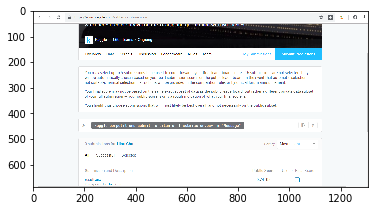

In [53]:
import matplotlib.image as mpimg
img = mpimg.imread('submit.png')
plt.imshow(img)

# Feature importances

In [54]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.320
Age,0.182
Fare_per_person,0.104
Deck,0.098
Pclass,0.086
Relatives,0.075
Embarked,0.056
SibSp,0.045
Parch,0.033
